                               reviewId                      userName  \
0  437314fe-1b1d-4352-abea-12fec30fce58                     Rajib Das   
1  4933ad2c-c70a-4a84-957d-d405439b2e0f         Mihaela Claudia Neagu   
2  1ab275fb-59bf-42c7-88ef-b85901f0445e               JONATHAN GRACIA   
3  b38406eb-7b11-4ceb-a45c-d7f28fb5d382                    Cam Rempel   
4  7be7999d-4cb6-47b9-8414-d7bdaa9df578  Your clowness (Her Clowness)   

                                             content  score  thumbsUpCount  \
0                                          It's good      4              0   
1  I love this app so much, I've been using Spoti...      5              0   
2                                            Perfect      5              0   
3  Best all around music streaming app I have use...      5              0   
4  Are y'all fr gatekeeping the play button on so...      1              0   

  reviewCreatedVersion                   at  appVersion  
0                  NaN  2024-05-09

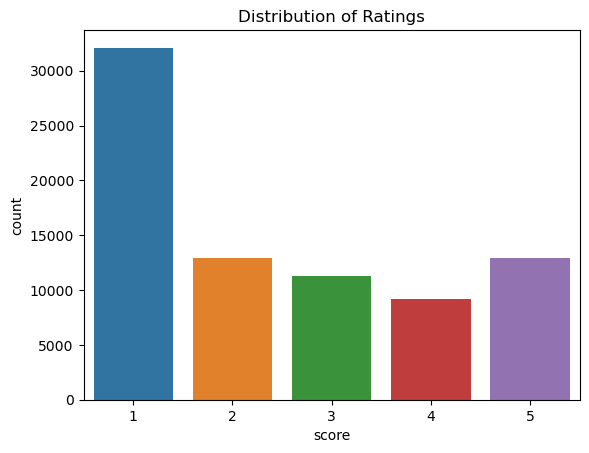

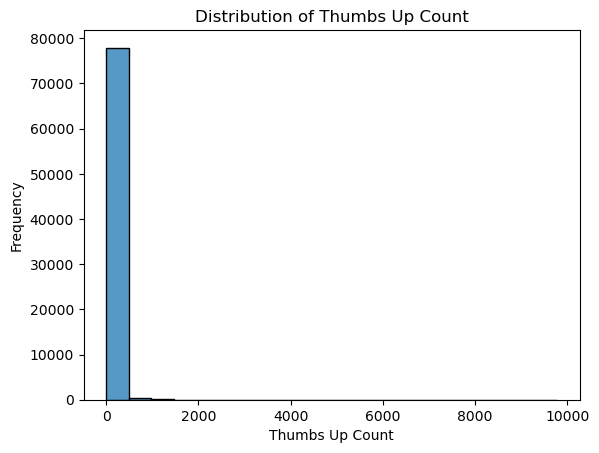

score
1    15.132112
2    19.346917
3    17.960494
4    17.460699
5    16.915555
Name: thumbsUpCount, dtype: float64


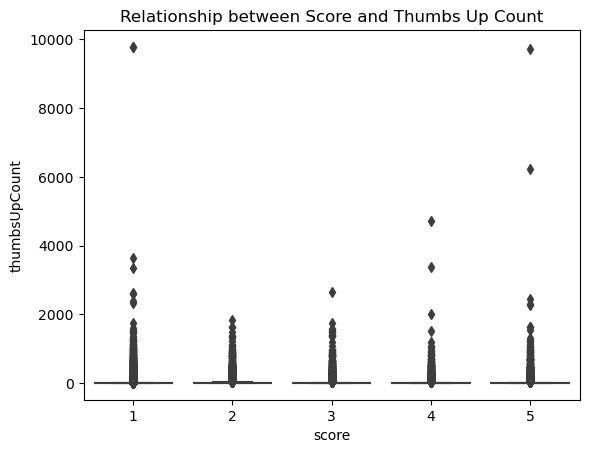

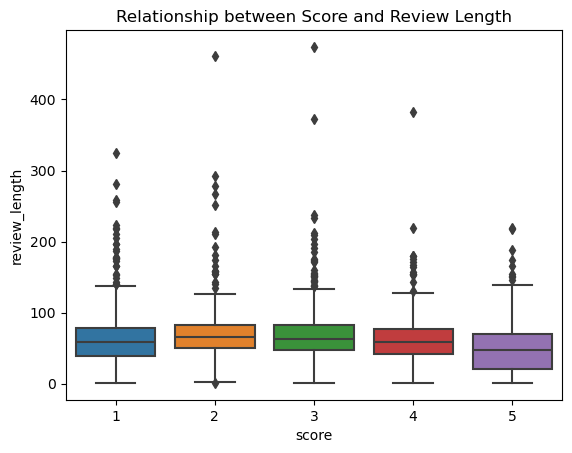

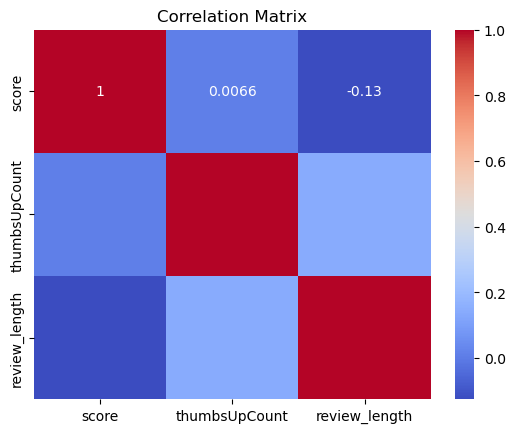

In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r'C:\Users\mbugu\OneDrive\Desktop\ML DATASET\spotify reviews\spotify_reviews.csv')

# Quick overview of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data preprocessing
# Drop rows with missing values
df.dropna(inplace=True)
# Data exploration and visualization

# Distribution of ratings
sns.countplot(x='score', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Distribution of thumbs up count
sns.histplot(df['thumbsUpCount'], bins=20)
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()

# Average thumbs up count per rating
avg_thumbs_up = df.groupby('score')['thumbsUpCount'].mean()
print(avg_thumbs_up)

# Relationship between score and thumbs up count
sns.boxplot(x='score', y='thumbsUpCount', data=df)
plt.title('Relationship between Score and Thumbs Up Count')
plt.show()
# Relationship between score and review length
df['review_length'] = df['content'].apply(lambda x: len(x.split()))
sns.boxplot(x='score', y='review_length', data=df)
plt.title('Relationship between Score and Review Length')
plt.show()

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['int64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 435.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 514.3 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 778.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/

In [7]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import nltk

In [8]:
pos_words = ''
neg_words=''
stopwords = set(STOPWORDS)

In [9]:
# Load the dataset
df = pd.read_csv(r'C:\Users\mbugu\OneDrive\Desktop\ML DATASET\spotify reviews\spotify_reviews.csv')

In [10]:
df=df[["content","score"]]

In [11]:
df

,content,score
0,It's good,4
1,"I love this app so much, I've been using Spoti...",5
2,Perfect,5
3,Best all around music streaming app I have use...,5
4,Are y'all fr gatekeeping the play button on so...,1
...,...,...
84160,The most decent music streaming app around rig...,3
84161,"As a premium user for a few years, Spotify is ...",4
84162,"There is lot of ads all of a sudden, and it's ...",3
84163,The UI could be better. I think there should b...,4


In [12]:
df.isna().sum()

content    0
score      0
dtype: int64

In [13]:
df.to_excel("score.xlsx")

In [14]:
review_count=df["score"].value_counts()

In [15]:
order=[1,2,3,4,5]
review_count=review_count.reindex(order)

<BarContainer object of 5 artists>

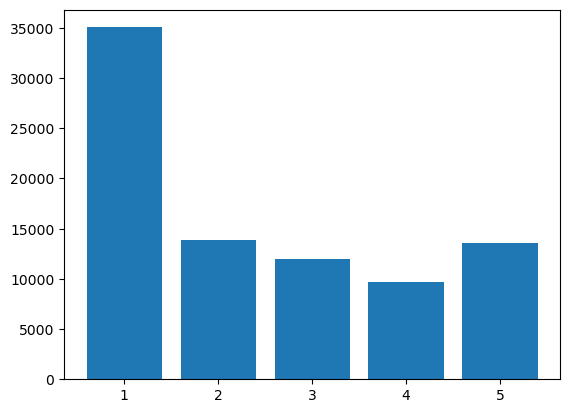

In [16]:
plt.bar(review_count.index,review_count.values)

In [17]:
avg_score=df["score"].sum()/len(df)

In [18]:
print("Average Score:",avg_score)

Average Score: 2.4396958355611003


In [19]:
nltk.download('vader')
sid = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader: Package 'vader' not found in index


In [20]:
df["pos"]=0
df["neg"]=0

In [21]:
def vader_sentiment(content):
    scores=sid.polarity_scores(content)
    return scores["pos"],scores["neg"]
df["pos"],df["neg"]=zip(*df["content"].apply(vader_sentiment))

In [22]:
pos_df=df[df["pos"]>0.5]
neg_df=df[df["neg"]>0.5]

In [23]:
len(pos_df),len(neg_df)

(941, 74)

In [24]:
scores=[1,2,3,4,5]

In [25]:
pos_reviews_df=pos_df["score"].value_counts()

In [27]:
#ANALYSIS OF POSITIVE REVIEWS.
pos_reviews_df=pos_reviews_df.reindex(scores)

In [28]:
pos_reviews_df

1     13
2      5
3     20
4     85
5    818
Name: score, dtype: int64

<Axes: title={'center': 'Score distribution of positive reviews'}>

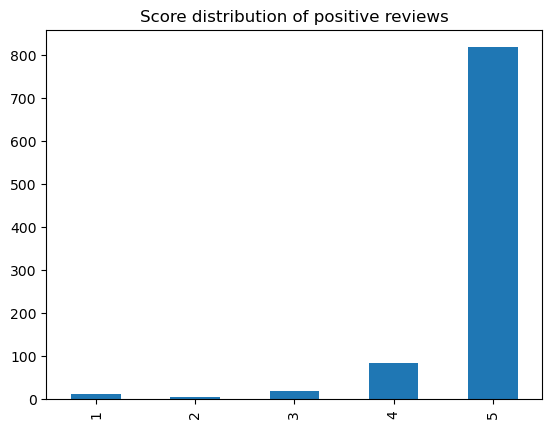

In [29]:
pos_reviews_df.plot(kind="bar",title="Score distribution of positive reviews")

In [30]:
for val in pos_df["content"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    pos_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=50,
                min_font_size = 10).generate(pos_words)

(-0.5, 799.5, 799.5, -0.5)

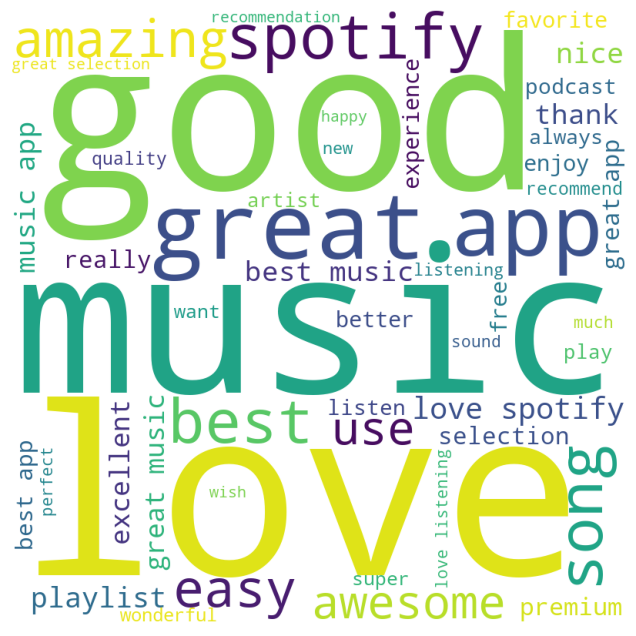

In [31]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

In [32]:
#ANALYSIS OF NEGATIVE REVIEWS.
neg_reviews_df=neg_df["score"].value_counts()

In [33]:
neg_reviews_df=neg_reviews_df.reindex(scores)

In [34]:
neg_reviews_df

1    60.0
2     5.0
3     4.0
4     NaN
5     5.0
Name: score, dtype: float64

<Axes: title={'center': 'Score distribution of negative reviews'}>

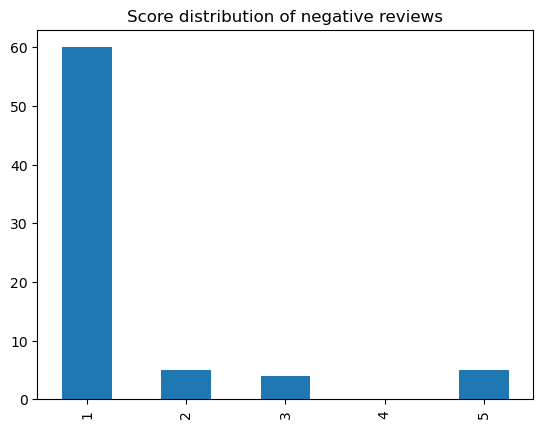

In [35]:
neg_reviews_df.plot(kind="bar",title="Score distribution of negative reviews")

In [36]:
for val in neg_df["content"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    neg_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=50,
                min_font_size = 10).generate(neg_words)

(-0.5, 799.5, 799.5, -0.5)

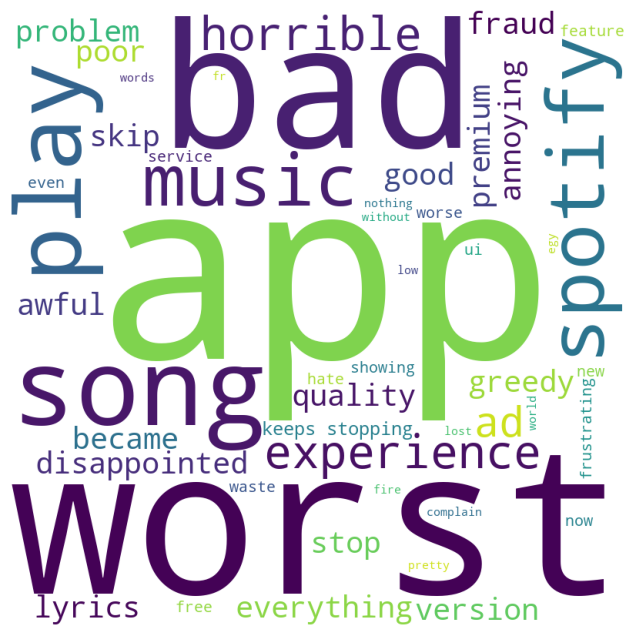

In [37]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")